In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import numpy as np
import laminate

╒════════════════════════════════╤═════════════════════════════════╤════════════════════════════════╕
│ A Matrix                       │ B Matrix                        │ D Matrix                       │
╞════════════════════════════════╪═════════════════════════════════╪════════════════════════════════╡
│ [[8.80e+10 6.90e+09 8.83e+08]  │ [[3.88e+09 -4.18e+08 4.42e+08]  │ [[3.22e+09 7.58e+08 8.02e+07]  │
│  [6.90e+09 3.95e+10 7.53e+09]  │  [-4.18e+08 -3.05e+09 3.76e+09] │  [7.58e+08 4.80e+09 6.84e+08]  │
│  [4.42e+08 3.76e+09 1.29e+10]] │  [2.21e+08 1.88e+09 -8.36e+08]] │  [4.01e+07 3.42e+08 1.45e+09]] │
╘════════════════════════════════╧═════════════════════════════════╧════════════════════════════════╛
╒════════════╤══════════╕
│ Property   │    Value │
╞════════════╪══════════╡
│ Ex         │ 9.77e+10 │
├────────────┼──────────┤
│ Ey         │ 4.39e+10 │
├────────────┼──────────┤
│ Gxy        │ 1.43e+10 │
├────────────┼──────────┤
│ vxy        │ 0.174    │
╘════════════╧══════════╛


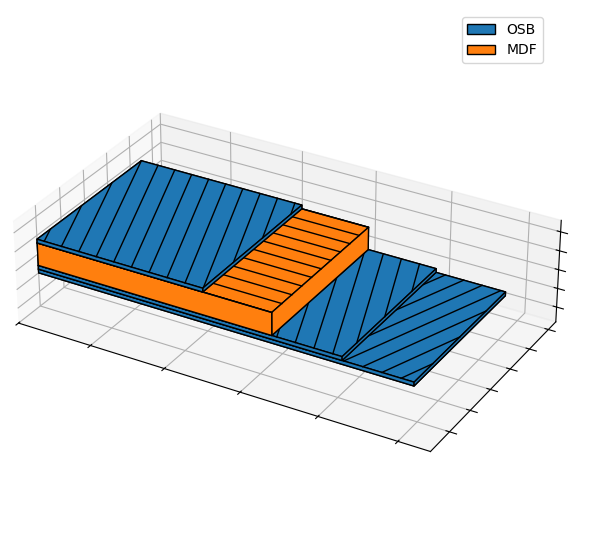

In [2]:
layers = [
    {'name': "OSB", 'E1': 140e9, 'E2': 10e9, 'G12': 5e9, 'v12': 0.3, 'theta':  70, 'thickness': 0.10},
    {'name': "OSB", 'E1': 140e9, 'E2': 10e9, 'G12': 5e9, 'v12': 0.3, 'theta': -70, 'thickness': 0.10},
    {'name': "MDF", 'E1': 140e9, 'E2': 10e9, 'G12': 5e9, 'v12': 0.3, 'theta':   0, 'thickness': 0.60},
    {'name': "OSB", 'E1': 140e9, 'E2': 10e9, 'G12': 5e9, 'v12': 0.3, 'theta': -70, 'thickness': 0.10}
]

Lam = laminate.Laminate(layers)
Lam.print_results()
Lam.plot()

In [3]:
laminate_analysis = laminate.LaminateLoadAnalysis(Lam)

midplane_strains, midplane_curvatures = laminate_analysis.apply_load(Nx=1000, Ny=100, Nxy=0)

ply_strains, ply_stresses = laminate_analysis.compute_ply_stresses_strains(midplane_strains, midplane_curvatures)

laminate_analysis.print_ply_results(ply_strains, ply_stresses)


Dehnungen pro Schicht:
╒═══════════╤══════════╤═══════════╤═══════════╕
│   Schicht │      Exx │       Eyy │       Gxy │
╞═══════════╪══════════╪═══════════╪═══════════╡
│         1 │ 1.82e-08 │ -1.05e-09 │  5.26e-10 │
├───────────┼──────────┼───────────┼───────────┤
│         2 │ 1.66e-08 │ -3.02e-10 │ -1.72e-10 │
├───────────┼──────────┼───────────┼───────────┤
│         3 │ 1.12e-08 │  2.32e-09 │ -2.61e-09 │
├───────────┼──────────┼───────────┼───────────┤
│         4 │ 5.79e-09 │  4.95e-09 │ -5.06e-09 │
╘═══════════╧══════════╧═══════════╧═══════════╛

Spannungen pro Schicht:
╒═══════════╤═══════╤═══════╤═══════╕
│   Schicht │   Sxx │   Syy │   Txy │
╞═══════════╪═══════╪═══════╪═══════╡
│         1 │   185 │ 151   │ -23.4 │
├───────────┼───────┼───────┼───────┤
│         2 │   184 │ 236   │  56.5 │
├───────────┼───────┼───────┼───────┤
│         3 │  1590 │  57.2 │ -13.1 │
├───────────┼───────┼───────┼───────┤
│         4 │   105 │ 270   │  45.4 │
╘═══════════╧═══════╧═══════╧═══

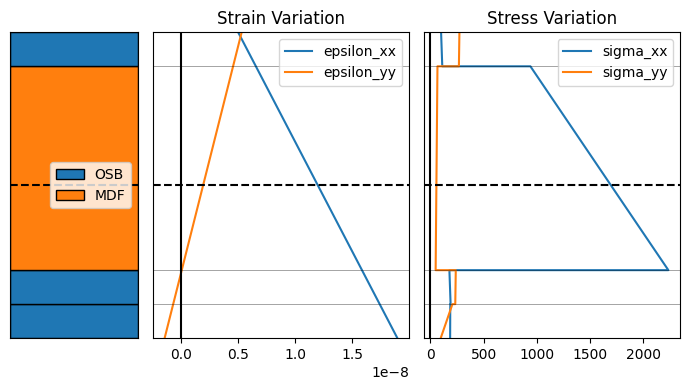

In [4]:
laminate_analysis.plot_stress_strain_variation()